# Kidney Stone Prediction

We use Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In this case if a person has kidney stone or not. 

### Aim

To analyze the data and then modelize the kidney stones based on the features given in the dataset. This case is binary logistic regression, as the result can be only 0 or 1.

### Data

This dataset can be used to predict the presence of kidney stones based on urine analysis.

The 79 urine specimens, were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.

**The six physical characteristics of the urine are:**

**specific gravity:** the density of the urine relative to water.

**pH:** The negative logarithm of the hydrogen ion.

**osmolarity (mOsm):** A unit used in biology and medicine but not in physical chemistry. Osmolarity is proportional to the concentration of molecules in solution.

**conductivity (mMho milliMho):** One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution.

**urea:** Urea concentration in millimoles per litre.

**CALC:** Calcium concentration in millimolesllitre.

The data used in this projected was extracted from kaggle.com.
https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis

path = '/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv'

### Libraries Used

In [7]:
!pip install imbalanced-learn

In [37]:
# make neccessary imports
!pip install plotly==5.14.1
!pip install Jinja2
!pip install numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.metrics import accuracy_score 
from sklearn.impute import  SimpleImputer

!pip install tensorflow
!pip install keras

from keras.layers import LSTM, Dense
from keras.models import Sequential

from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential

from keras.layers import LSTM, Dense
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten

from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

from matplotlib import pyplot as plt

# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

import concurrent.futures
import urllib.request
import keras
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)
# a sequential model is appropriate for plain stack of layers where each of layers has one input tensor and one output tensor. 

from keras.layers import Dense

from keras.layers import Dropout


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 1.9 MB/s eta 0:00:0000:0100:01
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


### Loading the Data

In [38]:

df = pd.read_csv('kindey_stone_urine_analysis.csv')
df


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [39]:
df.head(n = 10)

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
5,1.020,5.27,668,25.3,252,3.34,0
6,1.012,5.62,461,17.4,195,1.40,0
7,1.029,5.67,1107,35.9,550,8.48,0
8,1.015,5.41,543,21.9,170,1.16,0
9,1.021,6.13,779,25.7,382,2.21,0


In [40]:
df.shape

(79, 7)

In [41]:
#find null values in data set
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [42]:
# To find unique values in the columns to see if there is anything wrong in numbers:
# set keeps only the unique values
# tolist convert a column or a dataframe object into a list

for i in df.columns:
    print("******************** ", i, "******************** ")
    print()
    print(set(df[i].tolist()))
    print()
         



********************  gravity ******************** 

{1.011, 1.021, 1.008, 1.005, 1.017, 1.02, 1.012, 1.029, 1.015, 1.025, 1.013, 1.016, 1.007, 1.023, 1.01, 1.026, 1.033, 1.014, 1.027, 1.024, 1.04, 1.018, 1.031, 1.034, 1.009, 1.028, 1.006, 1.019, 1.022}

********************  ph ******************** 

{4.91, 5.51, 5.74, 6.52, 7.2, 5.27, 5.62, 5.67, 5.41, 6.13, 6.19, 7.12, 7.38, 6.21, 6.75, 5.14, 4.9, 4.76, 5.35, 5.68, 5.98, 5.85, 5.66, 6.76, 6.4, 6.35, 6.18, 5.33, 7.92, 5.36, 5.86, 6.27, 7.01, 5.58, 7.9, 5.77, 6.79, 6.29, 5.9, 5.4, 5.09, 5.56, 5.97, 5.44, 5.94, 5.16, 5.6, 6.9, 6.28, 4.81, 6.03, 5.21, 5.53, 5.47, 5.96, 5.87, 6.81, 6.88, 6.63, 6.14, 6.3, 7.61, 6.61, 6.56, 6.37, 5.64, 5.73, 7.94, 5.24, 5.71}

********************  osmo ******************** 

{516, 1032, 527, 531, 541, 543, 559, 565, 567, 577, 579, 594, 1107, 631, 658, 668, 680, 684, 694, 698, 187, 702, 703, 704, 721, 1236, 725, 736, 225, 749, 241, 242, 760, 251, 253, 256, 774, 775, 779, 781, 283, 803, 815, 822, 312, 321, 

## Statistial Aspects of Data

#### We want to see what kind of the correlations exist between independent attributes of data.

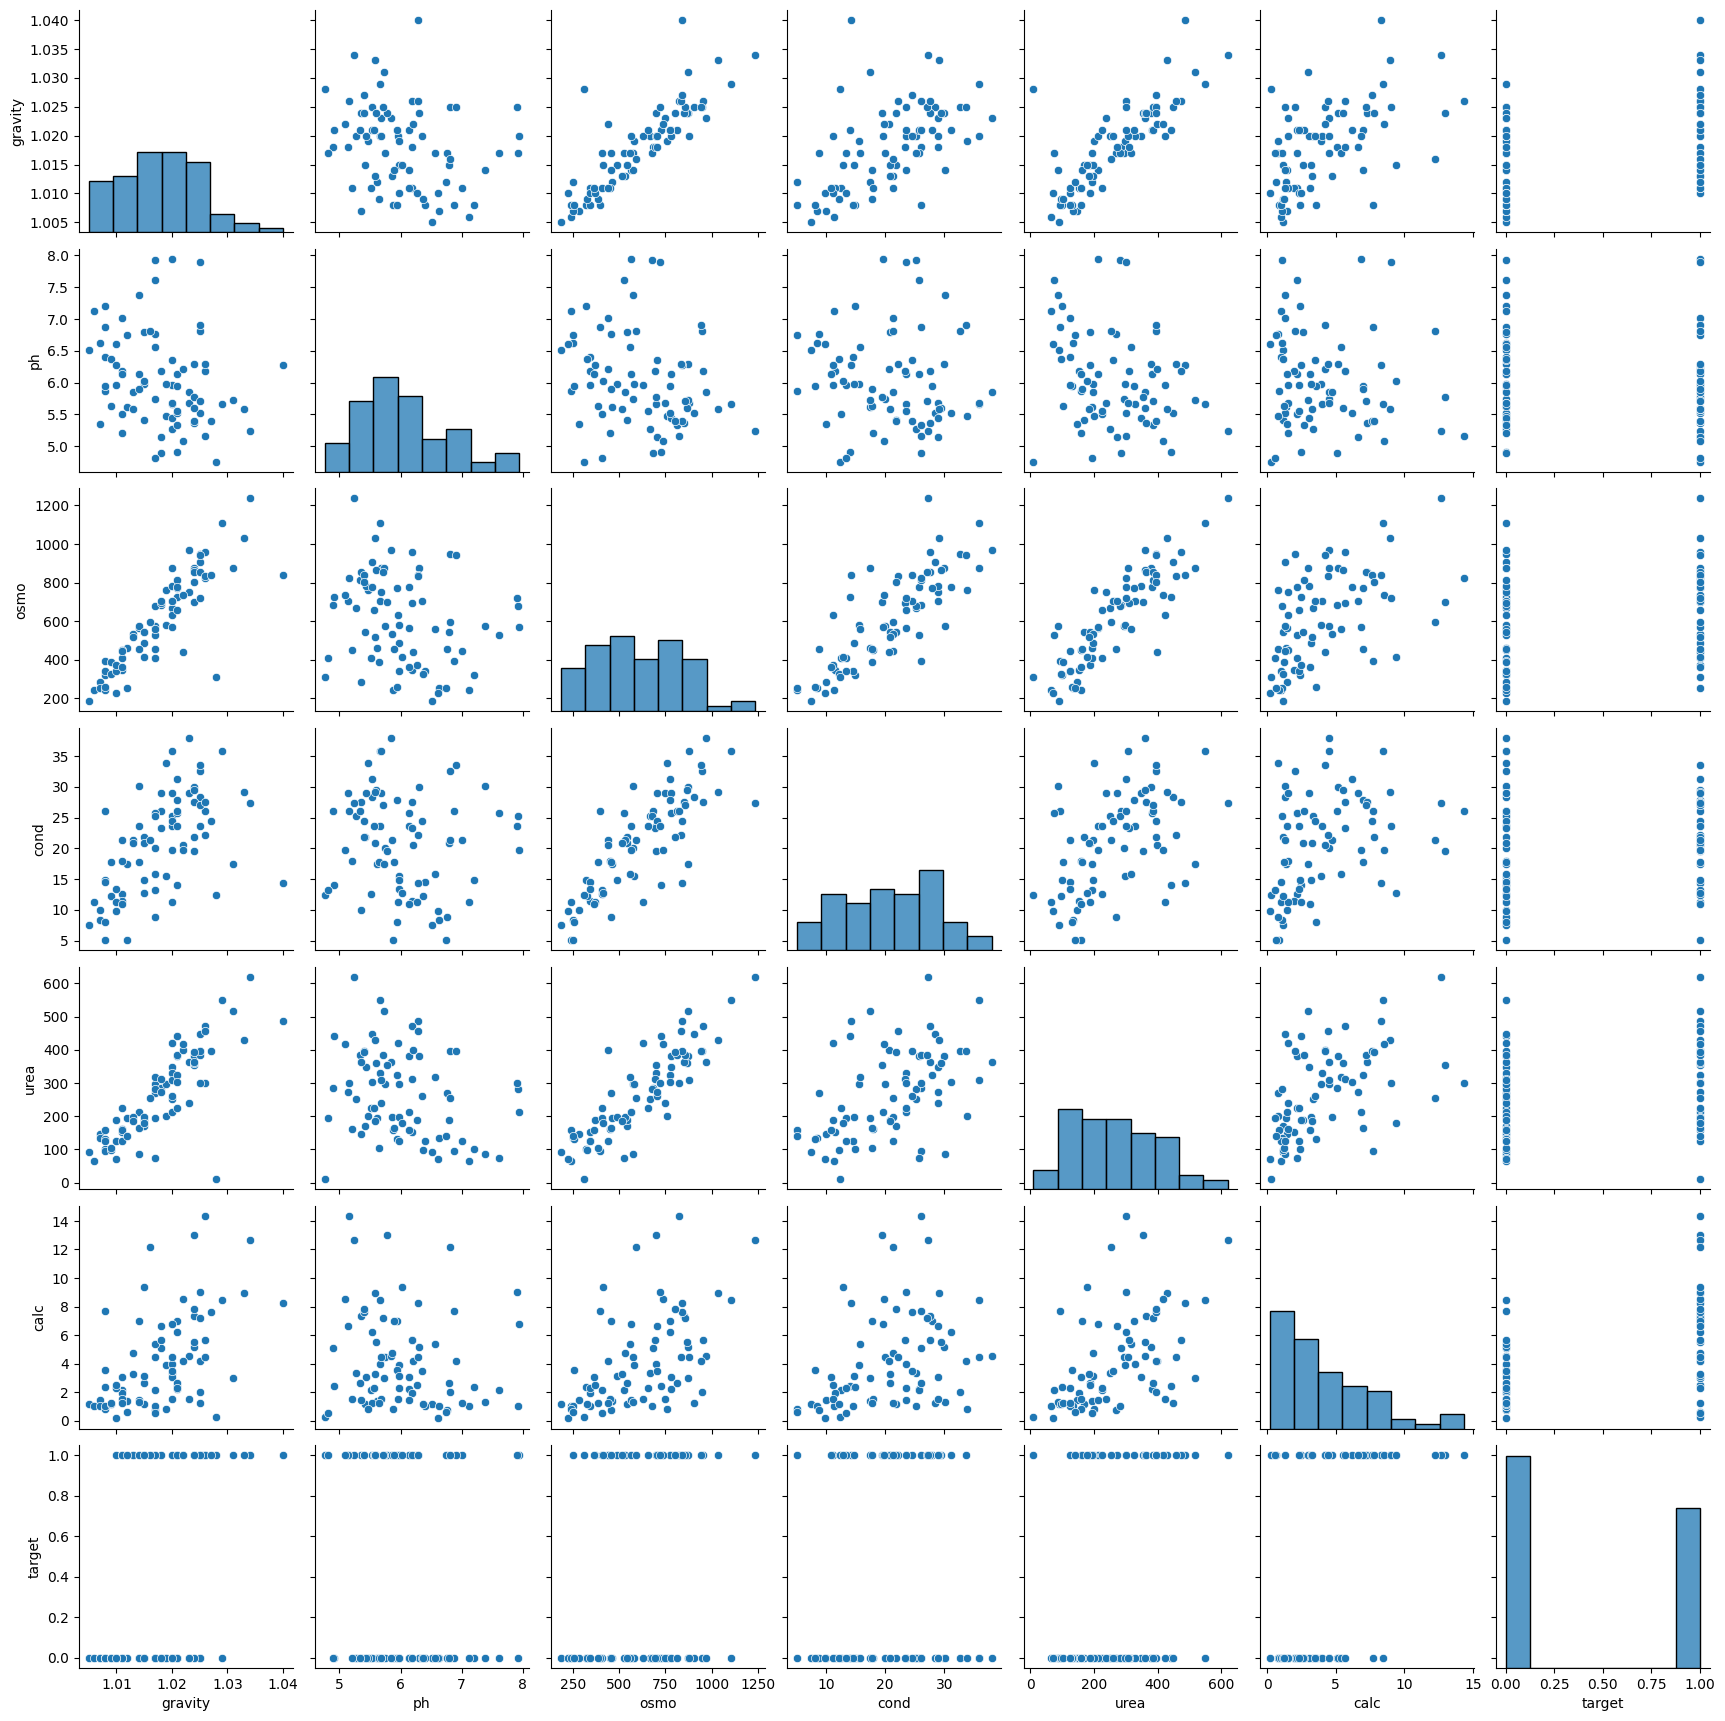

In [43]:
# this shows what kind of distribution out data set has

sns.pairplot(df)

We want to find the distribution of the data:

## Dataframe statistics


In [44]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
gravity,79.0,1.018114,0.007239,1.005,1.012,1.018,1.0235,1.04
ph,79.0,6.028481,0.724307,4.760,5.530,5.940,6.3850,7.94
osmo,79.0,612.848101,237.514755,187.000,413.000,594.000,792.0000,1236.00
cond,79.0,20.813924,7.938994,5.100,14.150,21.400,26.5500,38.00
urea,79.0,266.405063,131.254550,10.000,160.000,260.000,372.0000,620.00
calc,79.0,4.138987,3.260051,0.170,1.460,3.160,5.9300,14.34
target,79.0,0.430380,0.498293,0.000,0.000,0.000,1.0000,1.00


In [45]:
#drop the  rows with na or missing values
df=df.dropna(axis=0)
#splitting the data into independent (X) data set(the features) and dependent (y) data set(the target)
X=df.drop(['target'],axis=1)   #removes the target datapoint without storing in X i.e. the features
y=df['target']    #stores only the target datapoint in y 
print(X)
print(y)

    gravity    ph  osmo  cond  urea   calc
0     1.021  4.91   725  14.0   443   2.45
1     1.017  5.74   577  20.0   296   4.49
2     1.008  7.20   321  14.9   101   2.36
3     1.011  5.51   408  12.6   224   2.15
4     1.005  6.52   187   7.5    91   1.16
..      ...   ...   ...   ...   ...    ...
74    1.025  7.90   721  23.6   301   9.04
75    1.017  4.81   410  13.3   195   0.58
76    1.024  5.40   803  21.8   394   7.82
77    1.016  6.81   594  21.4   255  12.20
78    1.015  6.03   416  12.8   178   9.39

[79 rows x 6 columns]
0     0
1     0
2     0
3     0
4     0
     ..
74    1
75    1
76    1
77    1
78    1
Name: target, Length: 79, dtype: int64


In [46]:
#Feature scaling
#min-max scaler function scales the data so that all the input features lie between 0s and 1s
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_names=X.columns
X[column_names]=x_scaler.transform(X)
print(X[column_names])  

     gravity        ph      osmo      cond      urea      calc
0   0.457143  0.047170  0.512869  0.270517  0.709836  0.160903
1   0.342857  0.308176  0.371783  0.452888  0.468852  0.304869
2   0.085714  0.767296  0.127741  0.297872  0.149180  0.154552
3   0.171429  0.235849  0.210677  0.227964  0.350820  0.139732
4   0.000000  0.553459  0.000000  0.072948  0.132787  0.069866
..       ...       ...       ...       ...       ...       ...
74  0.571429  0.987421  0.509056  0.562310  0.477049  0.625970
75  0.342857  0.015723  0.212583  0.249240  0.303279  0.028934
76  0.542857  0.201258  0.587226  0.507599  0.629508  0.539873
77  0.314286  0.644654  0.387989  0.495441  0.401639  0.848977
78  0.285714  0.399371  0.218303  0.234043  0.275410  0.650670

[79 rows x 6 columns]


## Correlation Between Independent Variables

Finding correlations between independent variables is very important. Because if there is correlations between variables the value of the weight will be altered and we will not have correct output.

As you can see in the scale (right side of the plot), the lighter is the color, the correlation is bigger.

<Axes: >

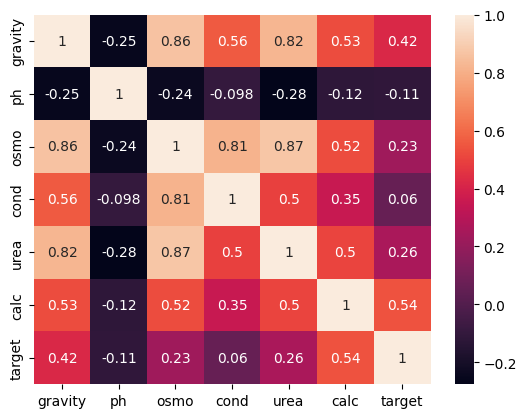

In [47]:
# plot the correlation between variables by using the corr function
# correlation between two independent would be a problem, 
#but correlation between one dependent and one independent variation won't be a problem
# the lighter the color, the higher correlation

corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot=True)


### Seperate dependent and independent variables:

In [48]:
# make some final changes to the data
# seperate independent and dependent variables 

x = df.drop(["target"], axis=1) # every other variable rather than target is independent
y = df["target"] # this is dependent variable



In [49]:
# check the lable balance
# library Counter show us to see how many occurances of the same value is there

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 45, 1: 34})


In [50]:
# balance the lables
# Oversampling technique: if the number of samples of the particular lable is less, we use the algorithms like nearest neighbor. we creat more of the lables.
# Undersampling : if the number of samples of the particular lable is more, we reduce the number of lables. 
# and we fitting the data

ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 45, 1: 45})


#### Initialize MinMaxScaler and scale the features between -1 and 1 and normalize them.
#### MinMaxScaler transforms features by scaling them to a given range.
#### The fit_transform() method fits to the data and then transforms it. We don't need to scale the labels. 

In [51]:
# scaling, we make sure all the values are in the range of -1 and 1
# initilize MinMaxScaler to scale the features
# the fit_transform() fits to the data and then transforms it. we don't need to scale the lables. 

scaler = MinMaxScaler((-1, 1))
x=scaler.fit_transform(x_ros)
y=y_ros

## Feature Extraction (Reduce the dimentionality of variables)

In [52]:
# Applying PCA

# The code between has .95 for the number of components parameter.
# It means that scikit-learn choose the minimum number of principal componenets such that 95% of variants is retained. 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.decomposition import PCA

pca = PCA(.95)
x_PCA= pca.fit_transform(x)

print(x.shape)
print(x_PCA.shape)

# Thus we need 4 columns to keep  95% of variance.

(90, 6)
(90, 4)


## Spliting the Dataset Into Training and Testing

To test the dataset we create four variables for train and then test the created function. We chose the test size 20 percent. 

In [53]:
# with PCA
# we split the dataset into training and testing sets, keeping 20% of the data for testing.
# this is required because we want to keep some of the unseen data to understand how the model works.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_PCA, y, test_size=0.2, random_state=7) # 0.2 means 80% training and 20% test

## Modelling

In [54]:
# create the model
# we need to import keras library and from that Dense to connect neural network layers.
# we use Sequential model which is appropriate for stack of layers where each layer has exactly one input and one output.
# DropOut randomly set the input units in 0. DropOut largly helps to avoid overfit.


def model():
    
    classifier = Sequential()
    classifier.add(Dense(4, input_shape = (x_train.shape[1],), activation= 'relu')) # relu (activation function) gives us only positive outputs.
    classifier.add(Dropout(0.2)) 
    classifier.add(Dense(3, activation = 'relu'))
    classifier.add(Dropout(0.4)) # we are getting 60 percent of DropOut of this particular layer
    classifier.add(Dense(1, activation = 'sigmoid')) # this is a binary classification, so the final Dense should be 1. it means we will get eather 1 or 0 as output.
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # compiling the model. setting the optimizer as adam. 
    
    return classifier

In [55]:
x_train.shape[1]

4

In [56]:
(x_train.shape[1]+1)*4

20

In [57]:
model = model()
model.summary()
# Param shows how many parameters we are actually training

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [58]:
# fitting the training data
#it would train with the training data and then test with the testing data to calculate the accuracy of the values
#otherwise we don't see the outcome

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, verbose = 1) # epochs can be any number, verbose should be 1 

# this model is probably overfitting because the accuracy is increasing but the val_accuracy is decreasing. so there is higher variance in the model 

Epoch 1/5
3/3 [==============================] - 3s 216ms/step - loss: 0.6941 - accuracy: 0.5278 - val_loss: 0.7865 - val_accuracy: 0.2778
Epoch 2/5
3/3 [==============================] - 0s 75ms/step - loss: 0.6828 - accuracy: 0.4444 - val_loss: 0.7851 - val_accuracy: 0.2778
Epoch 3/5
3/3 [==============================] - 0s 52ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.7832 - val_accuracy: 0.2778
Epoch 4/5
3/3 [==============================] - 0s 62ms/step - loss: 0.6733 - accuracy: 0.5833 - val_loss: 0.7811 - val_accuracy: 0.2778
Epoch 5/5
3/3 [==============================] - 0s 50ms/step - loss: 0.6936 - accuracy: 0.5556 - val_loss: 0.7797 - val_accuracy: 0.2778


## Observation

##### This model is probably overfitting because the accuracy is increasing but the val_accuracy is decreasing. 
##### So there is probably higher variance in the model. 
##### We changed the model for plotting.

## Logistic Regression

In [59]:
logreg = LogisticRegression()

In [60]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_pred=logreg.predict(x_test)

In [62]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  3],
       [ 2,  3]])

Text(0.5, 427.9555555555555, 'Predicted label')

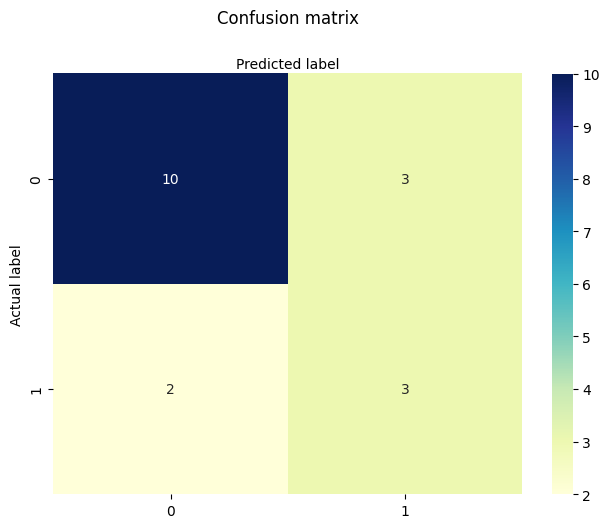

In [63]:
class_name=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7222222222222222
Precision: 0.5
Recall: 0.6


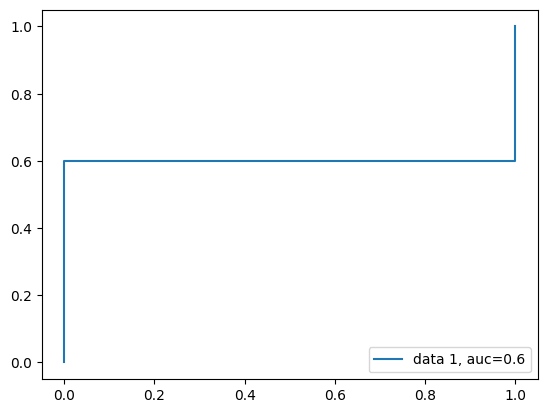

In [65]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Conclusion

This model is not accurate enough for the medical field. It's prefred to have 0.9 accuracy for pharmasutical or medical field because it is all about the patient's health. In this case shows the model is probably overfitting and a new model should be adopted.